Pré-processamento realizado em Processing.ipynb

# Bibliotecas

In [29]:
import os
import pandas as pd
import numpy as np
import scipy as sp
from scipy import signal
import ml_time_series as mls
import timeit
from datetime import datetime
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import utils
from sys import platform

%matplotlib notebook

In [231]:
def Stacker(files_,t):
    
    #Lê dados do arquivo e remove janela
    Xc = np.load('preproc/'+files_[len(files_)-1])
    Xc = Xc[:-49]
    #print files_[len(files_)-1]
    #print len(Xc)
    
    #Aplica Hstack nos dados
    for j in range(0,len(files_)-1):
        Xci = np.load('preproc/'+files_[j])
        #print files_[j]
        #print len(Xci)
        Xc = np.hstack((Xc.reshape(Xc.shape),Xci.reshape(Xci.shape)))
        
    #Labeling the PKS level    
    #C = (np.ones(len(Xc))*l).reshape((len(Xc),1))
    #Xc = np.hstack((Xc.reshape(Xc.shape),C.reshape((len(Xc),1))))    
    
    # Salving in file on the folder <preproc/labeled>  
    if "v" in t:
        np.save('preproc/stacked_v/'+t+'_hs', Xc, allow_pickle=False)
        DATAv_hs.append(t+'_hs.npy')
    else:
        np.save('preproc/stacked_t/'+t+'hs', Xc, allow_pickle=False)
        DATA_hs.append(t+'hs.npy')

In [396]:
if platform == "linux" or platform == "linux2":
    files = os.listdir('db/partitioned')
elif platform == "win32":
    files = os.listdir('C:\Users\jorge.junior\Documents\GitHub\PKS_ML\db\partitioned')
    
files_ = []
for i in files:
    #files_.append([i[:-4]+'_filt.npy',i[:-4]+'_rms.npy',i[:-4]+'_fft.npy',i[:-4]+'_peaks.npy',i[:-4]+'_std.npy'])
    files_.append([i[:-4]+'_filt.npy',i[:-4]+'_rms.npy',i[:-4]+'_fft.npy',i[:-4]+'_std.npy'])

list.sort(files)

In [397]:
files_[0][0][:8]

'pi06.1.1'

In [398]:
files_[0],files_[0][0][:8]

(['pi06.1.1_filt.npy',
  'pi06.1.1_rms.npy',
  'pi06.1.1_fft.npy',
  'pi06.1.1_std.npy'],
 'pi06.1.1')

In [399]:
#Grupo total e validação
DATA_hs = []
DATAv_hs = []
for i in range(len(files_)):
    Stacker(files_[i],files_[i][0][:9])

In [400]:
list.sort(DATA_hs)
DATA_hs

['pi06.1.1_hs.npy',
 'pi06.1.2_hs.npy',
 'pi06.1.3_hs.npy',
 'pi06.3.1_hs.npy',
 'pi06.3.2_hs.npy',
 'pi06.3.3_hs.npy',
 'pi07.1.1_hs.npy',
 'pi07.1.2_hs.npy',
 'pi07.1.3_hs.npy',
 'pi07.2.1_hs.npy',
 'pi07.2.2_hs.npy',
 'pi07.2.3_hs.npy',
 'pi09.1.1_hs.npy',
 'pi09.1.2_hs.npy',
 'pi09.1.3_hs.npy',
 'pi09.3.1_hs.npy',
 'pi09.3.2_hs.npy',
 'pi09.3.3_hs.npy',
 'pi16.1.1_hs.npy',
 'pi16.1.2_hs.npy',
 'pi16.1.3_hs.npy',
 'pi16.2.1_hs.npy',
 'pi16.2.2_hs.npy',
 'pi16.2.3_hs.npy',
 'pi17.1.1_hs.npy',
 'pi17.1.2_hs.npy',
 'pi17.1.3_hs.npy',
 'pi17.2.1_hs.npy',
 'pi17.2.2_hs.npy',
 'pi17.2.3_hs.npy',
 'pr06.1.1_hs.npy',
 'pr06.1.2_hs.npy',
 'pr06.1.3_hs.npy',
 'pr06.2.1_hs.npy',
 'pr06.2.2_hs.npy',
 'pr06.2.3_hs.npy',
 'pr07.1.1_hs.npy',
 'pr07.1.2_hs.npy',
 'pr07.1.3_hs.npy',
 'pr09.1.1_hs.npy',
 'pr09.1.2_hs.npy',
 'pr09.1.3_hs.npy',
 'pr09.2.1_hs.npy',
 'pr09.2.2_hs.npy',
 'pr09.2.3_hs.npy',
 'pr16.1.1_hs.npy',
 'pr16.1.2_hs.npy',
 'pr16.1.3_hs.npy',
 'pr16.2.1_hs.npy',
 'pr16.2.2_hs.npy',


In [401]:
list.sort(DATAv_hs)
DATAv_hs

['piv06.2.1_hs.npy',
 'piv06.2.2_hs.npy',
 'piv06.2.3_hs.npy',
 'piv07.3.1_hs.npy',
 'piv07.3.2_hs.npy',
 'piv07.3.3_hs.npy',
 'piv09.2.1_hs.npy',
 'piv09.2.2_hs.npy',
 'piv09.2.3_hs.npy',
 'piv16.3.1_hs.npy',
 'piv16.3.2_hs.npy',
 'piv16.3.3_hs.npy',
 'piv17.3.1_hs.npy',
 'piv17.3.2_hs.npy',
 'piv17.3.3_hs.npy',
 'prv06.3.1_hs.npy',
 'prv06.3.2_hs.npy',
 'prv06.3.3_hs.npy',
 'prv07.2.1_hs.npy',
 'prv07.2.2_hs.npy',
 'prv07.2.3_hs.npy',
 'prv09.3.1_hs.npy',
 'prv09.3.2_hs.npy',
 'prv09.3.3_hs.npy',
 'prv16.3.1_hs.npy',
 'prv16.3.2_hs.npy',
 'prv16.3.3_hs.npy',
 'prv17.3.1_hs.npy',
 'prv17.3.2_hs.npy',
 'prv17.3.3_hs.npy']

In [402]:
Xc = np.load('preproc/stacked_t/pr06.1.1_hs.npy')

In [403]:
dfn = pd.DataFrame(data=Xc)
dfn.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.008012,0.005458,0.054442,-0.055108,-0.000933,0.003024,-0.000911,0.002333,6.538195,4.492444,17.367166,14.146537,5.632277,7.969297,39.294102,162.808307
1,-0.049315,0.007679,0.026556,-0.055108,-0.016482,0.005833,-0.023176,0.004472,6.551378,4.474770,16.604748,14.146537,1.181517,1.262539,12.494615,3.992142
2,0.007477,0.005458,0.028701,-0.055108,-0.006325,0.003993,-0.031479,0.000052,6.294009,4.474770,16.424524,14.205700,1.365535,1.043233,19.267539,0.466960
3,-0.002849,0.005458,0.024411,-0.061283,0.007009,-0.001668,-0.028386,-0.006701,6.288016,4.699300,16.217454,14.233706,0.666651,0.787748,11.637271,3.842292
4,-0.013175,-0.010092,0.028701,-0.073634,-0.004382,-0.005448,-0.026331,-0.007560,6.295046,4.761814,16.106662,14.205700,0.903521,0.590054,0.968805,0.545747


In [404]:
Xc.shape

(3284L, 16L)

In [405]:
entropy = []

def proccess_data(x,DATA,NUM_SAMPLES,LABEL):
    
    if "v" in x:
         Xc = np.load("preproc/stacked_v/"+x)
    else:
         Xc = np.load("preproc/stacked_t/"+x)
   
    print '\nXc initial shape ', Xc.shape
    
    #Principal component analysis
    pca = PCA(n_components=8)
    pca.fit(Xc)
    Xc = pca.transform(Xc)
    print pca.explained_variance_ratio_
    entropy.append(sum(pca.explained_variance_ratio_))
    print 'Xc PCA shape ', Xc.shape
    
    #Create temporal serie
    #Xc = mls.generate_envelope(Xc, NUM_SAMPLES)
    #print 'Xc temporal-serie shape ', Xc.shape
    
    #Labeling the PKS level    
    C = (np.ones(len(Xc))*LABEL).reshape((len(Xc),1))
    Xc = np.hstack((Xc.reshape(Xc.shape),C.reshape((len(Xc),1)))) 
    print 'Xc labeled shape ', Xc.shape
    
    # Salving in file on the folder </preproc/labeled>
    if "v" in x:
        np.save('./preproc/labeled_v/'+x[:9]+'_tsl', Xc, allow_pickle=False)
        print '\n'+x[:9]+'_tsl'
        DATAv.append(x[:9]+'_tsl.npy')
    else:
        np.save('./preproc/labeled_t/'+x[:8]+'_tsl', Xc, allow_pickle=False)
        print '\n'+x[:8]+'_tsl'
        DATA.append(x[:8]+'_tsl.npy')
        

In [406]:
DATA_hs

['pi06.1.1_hs.npy',
 'pi06.1.2_hs.npy',
 'pi06.1.3_hs.npy',
 'pi06.3.1_hs.npy',
 'pi06.3.2_hs.npy',
 'pi06.3.3_hs.npy',
 'pi07.1.1_hs.npy',
 'pi07.1.2_hs.npy',
 'pi07.1.3_hs.npy',
 'pi07.2.1_hs.npy',
 'pi07.2.2_hs.npy',
 'pi07.2.3_hs.npy',
 'pi09.1.1_hs.npy',
 'pi09.1.2_hs.npy',
 'pi09.1.3_hs.npy',
 'pi09.3.1_hs.npy',
 'pi09.3.2_hs.npy',
 'pi09.3.3_hs.npy',
 'pi16.1.1_hs.npy',
 'pi16.1.2_hs.npy',
 'pi16.1.3_hs.npy',
 'pi16.2.1_hs.npy',
 'pi16.2.2_hs.npy',
 'pi16.2.3_hs.npy',
 'pi17.1.1_hs.npy',
 'pi17.1.2_hs.npy',
 'pi17.1.3_hs.npy',
 'pi17.2.1_hs.npy',
 'pi17.2.2_hs.npy',
 'pi17.2.3_hs.npy',
 'pr06.1.1_hs.npy',
 'pr06.1.2_hs.npy',
 'pr06.1.3_hs.npy',
 'pr06.2.1_hs.npy',
 'pr06.2.2_hs.npy',
 'pr06.2.3_hs.npy',
 'pr07.1.1_hs.npy',
 'pr07.1.2_hs.npy',
 'pr07.1.3_hs.npy',
 'pr09.1.1_hs.npy',
 'pr09.1.2_hs.npy',
 'pr09.1.3_hs.npy',
 'pr09.2.1_hs.npy',
 'pr09.2.2_hs.npy',
 'pr09.2.3_hs.npy',
 'pr16.1.1_hs.npy',
 'pr16.1.2_hs.npy',
 'pr16.1.3_hs.npy',
 'pr16.2.1_hs.npy',
 'pr16.2.2_hs.npy',


---

In [407]:
len(DATA_hs)

57

In [410]:
len(l)

57

In [409]:
#6=2; 7=3; 9=4; 17=1

l=[2,2,2,2,2,2, 3,3,3,3,3,3, 4,4,4,4,4,4, 1,1,1,1,1,1, 1,1,1,1,1,1, 2,2,2,2,2,2, 3,3,3, 4,4,4,4,4,4, 1,1,1,1,1,1, 1,1,1,1,1,1]
#l=[2,2,2,2,2,2, 3,3,3,3,3,3, 4,4,4,4,4,4, 2,2,2,2,2,2, 1,1,1,1,1,1, 1,1,1,1,1,1, 2,2,2,2,2,2, 3,3,3, 4,4,4,4,4,4, 2,2,2,2,2,2, 1,1,1,1,1,1, 1,1,1,1,1,1]
#l=[2,2,2,2,2,2, 2,2,2,2,2,2, 3,3,3,3,3,3, 4,4,4,4,4,4, 1,1,1,1,1,1, 1,1,1,1,1,1, 2,2,2,2,2,2, 2,2,2,2,2,2, 3,3,3, 4,4,4,4,4,4, 1,1,1,1,1,1, 1,1,1,1,1,1]
for x, y in zip(DATA_hs, l):
    print x[:8],y

pi06.1.1 2
pi06.1.2 2
pi06.1.3 2
pi06.3.1 2
pi06.3.2 2
pi06.3.3 2
pi07.1.1 3
pi07.1.2 3
pi07.1.3 3
pi07.2.1 3
pi07.2.2 3
pi07.2.3 3
pi09.1.1 4
pi09.1.2 4
pi09.1.3 4
pi09.3.1 4
pi09.3.2 4
pi09.3.3 4
pi16.1.1 1
pi16.1.2 1
pi16.1.3 1
pi16.2.1 1
pi16.2.2 1
pi16.2.3 1
pi17.1.1 1
pi17.1.2 1
pi17.1.3 1
pi17.2.1 1
pi17.2.2 1
pi17.2.3 1
pr06.1.1 2
pr06.1.2 2
pr06.1.3 2
pr06.2.1 2
pr06.2.2 2
pr06.2.3 2
pr07.1.1 3
pr07.1.2 3
pr07.1.3 3
pr09.1.1 4
pr09.1.2 4
pr09.1.3 4
pr09.2.1 4
pr09.2.2 4
pr09.2.3 4
pr16.1.1 1
pr16.1.2 1
pr16.1.3 1
pr16.2.1 1
pr16.2.2 1
pr16.2.3 1
pr17.1.1 1
pr17.1.2 1
pr17.1.3 1
pr17.2.1 1
pr17.2.2 1
pr17.2.3 1


In [411]:
#Grupo total
start = timeit.default_timer()

NUM_SAMPLES = 500

#l=[2,2,2, 3,3,3, 4,4,4, 1,1,1, 2,2,2,2,2,2, 3,3,3, 4,4,4,4,4,4, 1,1,1,1,1,1]
#l=[2,2,2, 2,2,2, 3,3,3, 3,3,3, 4,4,4, 4,4,4, 1,1,1, 1,1,1, 2,2,2, 2,2,2, 3,3,3, 4,4,4, 4,4,4, 1,1,1, 1,1,1]
#l=[2,2,2,2,2,2, 3,3,3,3,3,3, 4,4,4,4,4,4, 2,2,2,2,2,2, 1,1,1,1,1,1, 1,1,1,1,1,1, 2,2,2,2,2,2, 3,3,3, 4,4,4,4,4,4, 2,2,2,2,2,2, 1,1,1,1,1,1, 1,1,1,1,1,1]
l=[2,2,2,2,2,2, 3,3,3,3,3,3, 4,4,4,4,4,4, 1,1,1,1,1,1, 1,1,1,1,1,1, 2,2,2,2,2,2, 3,3,3, 4,4,4,4,4,4, 1,1,1,1,1,1, 1,1,1,1,1,1]
#l=[2,2,2,2,2,2, 2,2,2,2,2,2, 3,3,3,3,3,3, 4,4,4,4,4,4, 1,1,1,1,1,1, 1,1,1,1,1,1, 2,2,2,2,2,2, 2,2,2,2,2,2, 3,3,3, 4,4,4,4,4,4, 1,1,1,1,1,1, 1,1,1,1,1,1]

DATA = []

for x, y in zip(DATA_hs, l):
    proccess_data(x,DATA,NUM_SAMPLES,y)
    
stop = timeit.default_timer()
ti = stop - start 
print ('Tempo total para o envelopamento: %.2f min' % (ti/60))


Xc initial shape  (3284L, 16L)
[0.75 0.11 0.08 0.04 0.02 0.01 0.   0.  ]
Xc PCA shape  (3284L, 8L)
Xc labeled shape  (3284L, 9L)

pi06.1.1_tsl

Xc initial shape  (3284L, 16L)
[8.12e-01 9.05e-02 6.06e-02 2.03e-02 1.29e-02 2.61e-03 1.01e-03 4.49e-04]
Xc PCA shape  (3284L, 8L)
Xc labeled shape  (3284L, 9L)

pi06.1.2_tsl

Xc initial shape  (3284L, 16L)
[8.10e-01 7.78e-02 6.48e-02 3.23e-02 9.43e-03 4.04e-03 1.36e-03 6.30e-04]
Xc PCA shape  (3284L, 8L)
Xc labeled shape  (3284L, 9L)

pi06.1.3_tsl

Xc initial shape  (3284L, 16L)
[0.78 0.09 0.06 0.05 0.01 0.   0.   0.  ]
Xc PCA shape  (3284L, 8L)
Xc labeled shape  (3284L, 9L)

pi06.3.1_tsl

Xc initial shape  (3284L, 16L)
[0.8  0.08 0.06 0.05 0.01 0.01 0.   0.  ]
Xc PCA shape  (3284L, 8L)
Xc labeled shape  (3284L, 9L)

pi06.3.2_tsl

Xc initial shape  (3284L, 16L)
[0.75 0.11 0.06 0.05 0.01 0.01 0.   0.  ]
Xc PCA shape  (3284L, 8L)
Xc labeled shape  (3284L, 9L)

pi06.3.3_tsl

Xc initial shape  (2384L, 16L)
[0.58 0.25 0.07 0.05 0.04 0.01 0.   0.  

In [412]:
#print min(entropy)
import heapq

elements = heapq.nsmallest(10, entropy)
elements

[0.9996759404300267,
 0.999753330966515,
 0.9997579873058768,
 0.9997627580062373,
 0.9997702560760481,
 0.9997910851833356,
 0.999825029874942,
 0.999833014899905,
 0.999833122676303,
 0.999838713958262]

In [413]:
DATA[1:-2]

['pi06.1.2_tsl.npy',
 'pi06.1.3_tsl.npy',
 'pi06.3.1_tsl.npy',
 'pi06.3.2_tsl.npy',
 'pi06.3.3_tsl.npy',
 'pi07.1.1_tsl.npy',
 'pi07.1.2_tsl.npy',
 'pi07.1.3_tsl.npy',
 'pi07.2.1_tsl.npy',
 'pi07.2.2_tsl.npy',
 'pi07.2.3_tsl.npy',
 'pi09.1.1_tsl.npy',
 'pi09.1.2_tsl.npy',
 'pi09.1.3_tsl.npy',
 'pi09.3.1_tsl.npy',
 'pi09.3.2_tsl.npy',
 'pi09.3.3_tsl.npy',
 'pi16.1.1_tsl.npy',
 'pi16.1.2_tsl.npy',
 'pi16.1.3_tsl.npy',
 'pi16.2.1_tsl.npy',
 'pi16.2.2_tsl.npy',
 'pi16.2.3_tsl.npy',
 'pi17.1.1_tsl.npy',
 'pi17.1.2_tsl.npy',
 'pi17.1.3_tsl.npy',
 'pi17.2.1_tsl.npy',
 'pi17.2.2_tsl.npy',
 'pi17.2.3_tsl.npy',
 'pr06.1.1_tsl.npy',
 'pr06.1.2_tsl.npy',
 'pr06.1.3_tsl.npy',
 'pr06.2.1_tsl.npy',
 'pr06.2.2_tsl.npy',
 'pr06.2.3_tsl.npy',
 'pr07.1.1_tsl.npy',
 'pr07.1.2_tsl.npy',
 'pr07.1.3_tsl.npy',
 'pr09.1.1_tsl.npy',
 'pr09.1.2_tsl.npy',
 'pr09.1.3_tsl.npy',
 'pr09.2.1_tsl.npy',
 'pr09.2.2_tsl.npy',
 'pr09.2.3_tsl.npy',
 'pr16.1.1_tsl.npy',
 'pr16.1.2_tsl.npy',
 'pr16.1.3_tsl.npy',
 'pr16.2.1_ts

---

In [414]:
DATAv_hs

['piv06.2.1_hs.npy',
 'piv06.2.2_hs.npy',
 'piv06.2.3_hs.npy',
 'piv07.3.1_hs.npy',
 'piv07.3.2_hs.npy',
 'piv07.3.3_hs.npy',
 'piv09.2.1_hs.npy',
 'piv09.2.2_hs.npy',
 'piv09.2.3_hs.npy',
 'piv16.3.1_hs.npy',
 'piv16.3.2_hs.npy',
 'piv16.3.3_hs.npy',
 'piv17.3.1_hs.npy',
 'piv17.3.2_hs.npy',
 'piv17.3.3_hs.npy',
 'prv06.3.1_hs.npy',
 'prv06.3.2_hs.npy',
 'prv06.3.3_hs.npy',
 'prv07.2.1_hs.npy',
 'prv07.2.2_hs.npy',
 'prv07.2.3_hs.npy',
 'prv09.3.1_hs.npy',
 'prv09.3.2_hs.npy',
 'prv09.3.3_hs.npy',
 'prv16.3.1_hs.npy',
 'prv16.3.2_hs.npy',
 'prv16.3.3_hs.npy',
 'prv17.3.1_hs.npy',
 'prv17.3.2_hs.npy',
 'prv17.3.3_hs.npy']

In [415]:
len(DATAv_hs)

30

In [418]:
len(l)

30

In [417]:
#6=2; 7=3; 9=4; 17=1
#l=[2,2,2, 3,3,3, 4,4,4, 2,2,2, 1,1,1, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 2,2,2, 1,1,1, 1,1,1]
l=[2,2,2, 3,3,3, 4,4,4, 1,1,1, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1, 1,1,1]
#l=[2,2,2, 2,2,2, 3,3,3, 4,4,4, 1,1,1, 1,1,1, 2,2,2, 2,2,2, 3,3,3, 4,4,4, 1,1,1, 1,1,1]

for x, y in zip(DATAv_hs, l):
    print x[:9],y

piv06.2.1 2
piv06.2.2 2
piv06.2.3 2
piv07.3.1 3
piv07.3.2 3
piv07.3.3 3
piv09.2.1 4
piv09.2.2 4
piv09.2.3 4
piv16.3.1 1
piv16.3.2 1
piv16.3.3 1
piv17.3.1 1
piv17.3.2 1
piv17.3.3 1
prv06.3.1 2
prv06.3.2 2
prv06.3.3 2
prv07.2.1 3
prv07.2.2 3
prv07.2.3 3
prv09.3.1 4
prv09.3.2 4
prv09.3.3 4
prv16.3.1 1
prv16.3.2 1
prv16.3.3 1
prv17.3.1 1
prv17.3.2 1
prv17.3.3 1


In [419]:
#Grupo total
start = timeit.default_timer()

NUM_SAMPLES = 500

l=[2,2,2, 3,3,3, 4,4,4, 1,1,1, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 1,1,1, 1,1,1]
#l=[2,2,2, 3,3,3, 4,4,4, 2,2,2, 1,1,1, 1,1,1, 2,2,2, 3,3,3, 4,4,4, 2,2,2, 1,1,1, 1,1,1]
#l=[2,2,2, 2,2,2, 3,3,3, 4,4,4, 1,1,1, 1,1,1, 2,2,2, 2,2,2, 3,3,3, 4,4,4, 1,1,1, 1,1,1]

DATAv = []

for x, y in zip(DATAv_hs, l):
    proccess_data(x,DATAv,NUM_SAMPLES,y)
    
stop = timeit.default_timer()
ti = stop - start 
print ('Tempo total para o envelopamento: %.2f min' % (ti/60))


Xc initial shape  (3284L, 16L)
[8.36e-01 6.27e-02 4.72e-02 4.22e-02 5.89e-03 4.05e-03 1.59e-03 4.78e-04]
Xc PCA shape  (3284L, 8L)
Xc labeled shape  (3284L, 9L)

piv06.2.1_tsl

Xc initial shape  (3284L, 16L)
[7.86e-01 8.68e-02 6.73e-02 4.21e-02 1.10e-02 4.78e-03 1.70e-03 7.63e-04]
Xc PCA shape  (3284L, 8L)
Xc labeled shape  (3284L, 9L)

piv06.2.2_tsl

Xc initial shape  (3284L, 16L)
[0.79 0.08 0.07 0.05 0.01 0.01 0.   0.  ]
Xc PCA shape  (3284L, 8L)
Xc labeled shape  (3284L, 9L)

piv06.2.3_tsl

Xc initial shape  (3284L, 16L)
[0.47 0.32 0.09 0.06 0.04 0.01 0.01 0.  ]
Xc PCA shape  (3284L, 8L)
Xc labeled shape  (3284L, 9L)

piv07.3.1_tsl

Xc initial shape  (3284L, 16L)
[0.55 0.24 0.09 0.05 0.05 0.01 0.01 0.  ]
Xc PCA shape  (3284L, 8L)
Xc labeled shape  (3284L, 9L)

piv07.3.2_tsl

Xc initial shape  (3284L, 16L)
[0.6  0.23 0.07 0.06 0.03 0.01 0.01 0.  ]
Xc PCA shape  (3284L, 8L)
Xc labeled shape  (3284L, 9L)

piv07.3.3_tsl

Xc initial shape  (3284L, 16L)
[0.33 0.27 0.25 0.07 0.06 0.01 0. 

In [420]:
#print min(entropy)
import heapq

elements = heapq.nsmallest(10, entropy)
elements

[0.9996759404300267,
 0.999753330966515,
 0.9997579873058768,
 0.9997627580062373,
 0.999765561464847,
 0.9997699928353116,
 0.9997702560760481,
 0.9997910851833356,
 0.9998046110224097,
 0.999825029874942]

In [421]:
DATA

['pi06.1.1_tsl.npy',
 'pi06.1.2_tsl.npy',
 'pi06.1.3_tsl.npy',
 'pi06.3.1_tsl.npy',
 'pi06.3.2_tsl.npy',
 'pi06.3.3_tsl.npy',
 'pi07.1.1_tsl.npy',
 'pi07.1.2_tsl.npy',
 'pi07.1.3_tsl.npy',
 'pi07.2.1_tsl.npy',
 'pi07.2.2_tsl.npy',
 'pi07.2.3_tsl.npy',
 'pi09.1.1_tsl.npy',
 'pi09.1.2_tsl.npy',
 'pi09.1.3_tsl.npy',
 'pi09.3.1_tsl.npy',
 'pi09.3.2_tsl.npy',
 'pi09.3.3_tsl.npy',
 'pi16.1.1_tsl.npy',
 'pi16.1.2_tsl.npy',
 'pi16.1.3_tsl.npy',
 'pi16.2.1_tsl.npy',
 'pi16.2.2_tsl.npy',
 'pi16.2.3_tsl.npy',
 'pi17.1.1_tsl.npy',
 'pi17.1.2_tsl.npy',
 'pi17.1.3_tsl.npy',
 'pi17.2.1_tsl.npy',
 'pi17.2.2_tsl.npy',
 'pi17.2.3_tsl.npy',
 'pr06.1.1_tsl.npy',
 'pr06.1.2_tsl.npy',
 'pr06.1.3_tsl.npy',
 'pr06.2.1_tsl.npy',
 'pr06.2.2_tsl.npy',
 'pr06.2.3_tsl.npy',
 'pr07.1.1_tsl.npy',
 'pr07.1.2_tsl.npy',
 'pr07.1.3_tsl.npy',
 'pr09.1.1_tsl.npy',
 'pr09.1.2_tsl.npy',
 'pr09.1.3_tsl.npy',
 'pr09.2.1_tsl.npy',
 'pr09.2.2_tsl.npy',
 'pr09.2.3_tsl.npy',
 'pr16.1.1_tsl.npy',
 'pr16.1.2_tsl.npy',
 'pr16.1.3_ts

In [422]:
DATAv

['piv06.2.1_tsl.npy',
 'piv06.2.2_tsl.npy',
 'piv06.2.3_tsl.npy',
 'piv07.3.1_tsl.npy',
 'piv07.3.2_tsl.npy',
 'piv07.3.3_tsl.npy',
 'piv09.2.1_tsl.npy',
 'piv09.2.2_tsl.npy',
 'piv09.2.3_tsl.npy',
 'piv16.3.1_tsl.npy',
 'piv16.3.2_tsl.npy',
 'piv16.3.3_tsl.npy',
 'piv17.3.1_tsl.npy',
 'piv17.3.2_tsl.npy',
 'piv17.3.3_tsl.npy',
 'prv06.3.1_tsl.npy',
 'prv06.3.2_tsl.npy',
 'prv06.3.3_tsl.npy',
 'prv07.2.1_tsl.npy',
 'prv07.2.2_tsl.npy',
 'prv07.2.3_tsl.npy',
 'prv09.3.1_tsl.npy',
 'prv09.3.2_tsl.npy',
 'prv09.3.3_tsl.npy',
 'prv16.3.1_tsl.npy',
 'prv16.3.2_tsl.npy',
 'prv16.3.3_tsl.npy',
 'prv17.3.1_tsl.npy',
 'prv17.3.2_tsl.npy',
 'prv17.3.3_tsl.npy']

## Shape data

In [423]:
cdata=0
#Separando set de dados X, e set de labels y - Treino e Teste
Xc = np.load("preproc/labeled_t/"+DATA[0])
#for i in DATA[1:-2]:

for i in DATA[1:]:
    Xc = np.vstack((Xc,np.load('preproc/labeled_t/'+i)))
    cdata += 1
    print ("Vstacking DATA test on X: %i de %i" % (cdata, len(DATA)))
    
X = Xc[:,0:(Xc.shape[1]-1)]

print "Creating labels vector ..."

yz = Xc[:,[(Xc.shape[1]-1)]]
y = np.array([])
for i in range(len(yz)):
    y = np.hstack((y,yz[i]))
    
X.shape, y.shape

Vstacking DATA test on X: 1 de 57
Vstacking DATA test on X: 2 de 57
Vstacking DATA test on X: 3 de 57
Vstacking DATA test on X: 4 de 57
Vstacking DATA test on X: 5 de 57
Vstacking DATA test on X: 6 de 57
Vstacking DATA test on X: 7 de 57
Vstacking DATA test on X: 8 de 57
Vstacking DATA test on X: 9 de 57
Vstacking DATA test on X: 10 de 57
Vstacking DATA test on X: 11 de 57
Vstacking DATA test on X: 12 de 57
Vstacking DATA test on X: 13 de 57
Vstacking DATA test on X: 14 de 57
Vstacking DATA test on X: 15 de 57
Vstacking DATA test on X: 16 de 57
Vstacking DATA test on X: 17 de 57
Vstacking DATA test on X: 18 de 57
Vstacking DATA test on X: 19 de 57
Vstacking DATA test on X: 20 de 57
Vstacking DATA test on X: 21 de 57
Vstacking DATA test on X: 22 de 57
Vstacking DATA test on X: 23 de 57
Vstacking DATA test on X: 24 de 57
Vstacking DATA test on X: 25 de 57
Vstacking DATA test on X: 26 de 57
Vstacking DATA test on X: 27 de 57
Vstacking DATA test on X: 28 de 57
Vstacking DATA test on X: 29 

((176484L, 8L), (176484L,))

In [424]:
np.unique(y)

array([1., 2., 3., 4.])

In [425]:
#Dividindo os dados em sets de treino, test e validação
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#X_test, X_validate, y_test, y_validate = train_test_split(X_test_p, y_test_p, test_size=0.5, random_state=1)

In [426]:
cdata=0
#Separando set de dados X, e set de labels y - Validação
Xc = np.load("preproc/labeled_v/"+DATAv[0])
for i in DATAv[1:]:
    Xc = np.vstack((Xc,np.load('preproc/labeled_v/'+i))) 
    cdata += 1
    print ("Vstacking DATA test on X: %i de %i" % (cdata, len(DATAv)))
    
X_validate = Xc[:,0:(Xc.shape[1]-1)]

print "Creating labels vector ..."

yz = Xc[:,[(Xc.shape[1]-1)]]
y_validate = np.array([])
for i in range(len(yz)):
    y_validate = np.hstack((y_validate,yz[i]))
    
X_validate.shape, y_validate.shape

Vstacking DATA test on X: 1 de 30
Vstacking DATA test on X: 2 de 30
Vstacking DATA test on X: 3 de 30
Vstacking DATA test on X: 4 de 30
Vstacking DATA test on X: 5 de 30
Vstacking DATA test on X: 6 de 30
Vstacking DATA test on X: 7 de 30
Vstacking DATA test on X: 8 de 30
Vstacking DATA test on X: 9 de 30
Vstacking DATA test on X: 10 de 30
Vstacking DATA test on X: 11 de 30
Vstacking DATA test on X: 12 de 30
Vstacking DATA test on X: 13 de 30
Vstacking DATA test on X: 14 de 30
Vstacking DATA test on X: 15 de 30
Vstacking DATA test on X: 16 de 30
Vstacking DATA test on X: 17 de 30
Vstacking DATA test on X: 18 de 30
Vstacking DATA test on X: 19 de 30
Vstacking DATA test on X: 20 de 30
Vstacking DATA test on X: 21 de 30
Vstacking DATA test on X: 22 de 30
Vstacking DATA test on X: 23 de 30
Vstacking DATA test on X: 24 de 30
Vstacking DATA test on X: 25 de 30
Vstacking DATA test on X: 26 de 30
Vstacking DATA test on X: 27 de 30
Vstacking DATA test on X: 28 de 30
Vstacking DATA test on X: 29 

((94518L, 8L), (94518L,))

In [427]:
np.unique(y_validate)

array([1., 2., 3., 4.])

In [428]:
#Aplica normalizador P.S.: Verificar necessidade pois os dados já foram normalizados anteriormente
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_validate_std = sc.transform(X_validate)

print X_train_std.shape, X_test_std.shape, X_validate_std.shape, y_train.shape, y_test.shape, y_validate.shape

(123538L, 8L) (52946L, 8L) (94518L, 8L) (123538L,) (52946L,) (94518L,)


(94065, 8) (40314, 8) (96822, 8) (94065,) (40314,) (96822,)

In [429]:
X_validate_std = sc.transform(X_validate)

X_validate_std.shape, y_validate.shape

((94518L, 8L), (94518L,))

---

## Classifiers

### Random Forest

In [430]:
#Training and test
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion="entropy", oob_score=True, n_jobs = 4)

print 'Training time'
%time rfc = rfc.fit(X_train_std, y_train)

print''

print 'Predict time'
%time rfc_y_pred = rfc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score
print ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_test, rfc_y_pred)*100))

Training time
Wall time: 1min 47s

Predict time
Wall time: 1.31 s

ClassifyRF accuracy:---------->84.63 %


#### Resultado anterior
H-Y Simpliicada + n0

Training time
CPU times: user 59 s, sys: 696 ms, total: 59.7 s
Wall time: 15.5 s

Predict time
CPU times: user 5.14 s, sys: 16 ms, total: 5.15 s
Wall time: 1.45 s

ClassifyRF accuracy:---------->73.55 %

---

Todas as clases

Training time
CPU times: user 59.5 s, sys: 980 ms, total: 1min
Wall time: 16.6 s

Predict time
CPU times: user 5.46 s, sys: 32 ms, total: 5.49 s
Wall time: 1.56 s

ClassifyRF accuracy:---------->71.82 %

---
Overfited

Training time
CPU times: user 59.5 s, sys: 1.2 s, total: 1min
Wall time: 17.2 s

Predict time
CPU times: user 9.07 s, sys: 132 ms, total: 9.2 s
Wall time: 2.75 s

ClassifyRF accuracy:---------->100.00 %

#Salva a rede treinada para um arquivo
joblib.dump(rfc, 'DB_INTENC/preproc/labeled/rfc_split2.pkl') 

rfc = joblib.load('DB_INTENC/preproc/labeled/rfc.pkl')

In [431]:
#Validation
print 'Predict time'
%time rfc_y_pred_v = rfc.predict(X_validate)

print''

from sklearn.metrics import accuracy_score

result = ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(rfc_y_pred_v, y_validate)*100))

print result

Predict time
Wall time: 1.48 s

ClassifyRF accuracy:---------->26.83 %


#### Resultado anterior
H-Y Simpliicada + n0

Predict time
CPU times: user 4.2 s, sys: 124 ms, total: 4.32 s
Wall time: 1.23 s

ClassifyRF accuracy:---------->29.25 %


---

Predict time
CPU times: user 4.48 s, sys: 548 ms, total: 5.02 s
Wall time: 1.45 s

ClassifyRF accuracy:---------->25.98 %

---

Predict time
CPU times: user 1.73 s, sys: 220 ms, total: 1.95 s
Wall time: 707 ms

ClassifyRF accuracy:---------->27.10 %


In [432]:
#Validation
print 'Predict time'
%time rfc_y_pred_v = rfc.predict(X_validate_std)

print''

from sklearn.metrics import accuracy_score

result = ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(rfc_y_pred_v, y_validate)*100))

print result

Predict time
Wall time: 1.91 s

ClassifyRF accuracy:---------->60.69 %


#### Resultado anterior
H-Y Simpliicada + n0

Predict time
CPU times: user 10.1 s, sys: 80 ms, total: 10.1 s
Wall time: 2.94 s

ClassifyRF accuracy:---------->45.17 %

---

Predict time
CPU times: user 10.5 s, sys: 552 ms, total: 11.1 s
Wall time: 3.03 s

ClassifyRF accuracy:---------->42.09 %

---

Predict time

CPU times: user 6.7 s, sys: 372 ms, total: 7.07 s
Wall time: 2.05 s

ClassifyRF accuracy:---------->85.97 %


In [433]:
rfc_y_pred_v

array([3., 3., 3., ..., 1., 1., 1.])

In [434]:
list(y_validate).count(3)

19704

In [435]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, rfc_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')

In [436]:
confusion_matrix
cm = confusion_matrix
cm

array([[25938.,  4663.,  2006.,  2799.],
       [ 4497., 13050.,  1225.,   932.],
       [ 4241.,  1829.,  9651.,  3983.],
       [ 6765.,  1605.,  2609.,  8725.]])

In [437]:
FN = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FP = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [438]:
print 'TP:', TP, '=', sum(TP)
print 'TN:', TN, '=', sum(TN)
print 'FP:', FP, '=', sum(FP)
print 'FN:', FN, '=', sum(FN)

TP: [25938. 13050.  9651.  8725.] = 57364.0
TN: [43609. 66717. 68974. 67100.] = 246400.0
FP: [ 9468.  6654. 10053. 10979.] = 37154.0
FN: [15503.  8097.  5840.  7714.] = 37154.0


In [439]:
#P1 = sum(cm[0][:5])
#P2 = sum(cm[1][:5])
#P3 = sum(cm[2][:5])
#P4 = sum(cm[3][:5])
#P5 = sum(cm[4][:5])

P1 = sum(cm[0][:4])
P2 = sum(cm[1][:4])
P3 = sum(cm[2][:4])
P4 = sum(cm[3][:4])

#P1 = sum(cm[0][:2])
#P2 = sum(cm[1][:2])

In [440]:
#P1 = (TP[0])/sum(cm[0][:5])
#P2 = (TP[1])/sum(cm[1][:5])
#P3 = (TP[2])/sum(cm[2][:5])
#P4 = (TP[3])/sum(cm[3][:5])
#P5 = (TP[4])/sum(cm[4][:5])

#S1 = (TP[0])/sum(cm[:5,[0]])
#S2 = (TP[1])/sum(cm[:5,[1]])
#S3 = (TP[2])/sum(cm[:5,[2]])
#S4 = (TP[3])/sum(cm[:5,[3]])
#S5 = (TP[4])/sum(cm[:5,[4]])

#(P1+P2+P3+P4+P5)/5

P1 = (TP[0])/sum(cm[0][:4])
P2 = (TP[1])/sum(cm[1][:4])
P3 = (TP[2])/sum(cm[2][:4])
P4 = (TP[3])/sum(cm[3][:4])

S1 = (TP[0])/sum(cm[:5,[0]])
S2 = (TP[1])/sum(cm[:5,[1]])
S3 = (TP[2])/sum(cm[:5,[2]])
S4 = (TP[3])/sum(cm[:5,[3]])

(P1+P2+P3+P4)/4

#P1 = (TP[0])/sum(cm[0][:2])
#P2 = (TP[1])/sum(cm[1][:2])

#S1 = (TP[0])/sum(cm[:2,[0]])
#S2 = (TP[1])/sum(cm[:2,[1]])

#(P1+P2)/2

0.5818730712253606

In [441]:
print (P1,P2,P3,P4)
print ''
print (S1,S2,S3,S4)

#print (P1,P2)
#print ''
#print (S1,S2)

(0.7325876970005084, 0.6623020706455542, 0.48979902557856275, 0.4428034916768169)

(array([0.63]), array([0.62]), array([0.62]), array([0.53]))


In [442]:
(S1+S2+S3+S4)/4

array([0.6])

In [443]:
(TP+FP)

array([35406., 19704., 19704., 19704.])

In [444]:
TPR*100 # Sensitivity

array([62.59, 61.71, 62.3 , 53.08])

In [391]:
TNR*100 # Specificity

array([81.46, 85.09, 89.26, 87.91])

In [392]:
PPV*100 # Precision

array([61.87, 72.12, 46.68, 41.07])

In [393]:
ACC*100 # Accuracy

array([72.38, 77.06, 86.05, 82.45])

In [445]:
print ('Sensitivity %.2f%%' %(sum(TPR)/4*100))
print ('Specificity %.2f%%' %(sum(TNR)/4*100))
print ('Precision %.2f%%' %(sum(PPV)/4*100))
print ('Accuray %.2f%%' %(sum(ACC)/4*100))

#print ('Sensitivity %.2f%%' %(sum(TPR)/2*100))
#print ('Specificity %.2f%%' %(sum(TNR)/2*100))
#print ('Precision %.2f%%' %(sum(PPV)/2*100))
#print ('Accuray %.2f%%' %(sum(ACC)/2*100))

Sensitivity 59.92%
Specificity 86.58%
Precision 58.19%
Accuray 80.35%


#### Resultado anterior
Sensitivity 56.11%

Specificity 85.39%

Precision 56.28%

Accuray 78.06%

#### Antes do Quaçify
Sensitivity 44.06%

Specificity 86.15%

Precision 45.71%

Accuray 78.07%

## Confusion Matrix

<IPython.core.display.Javascript object>


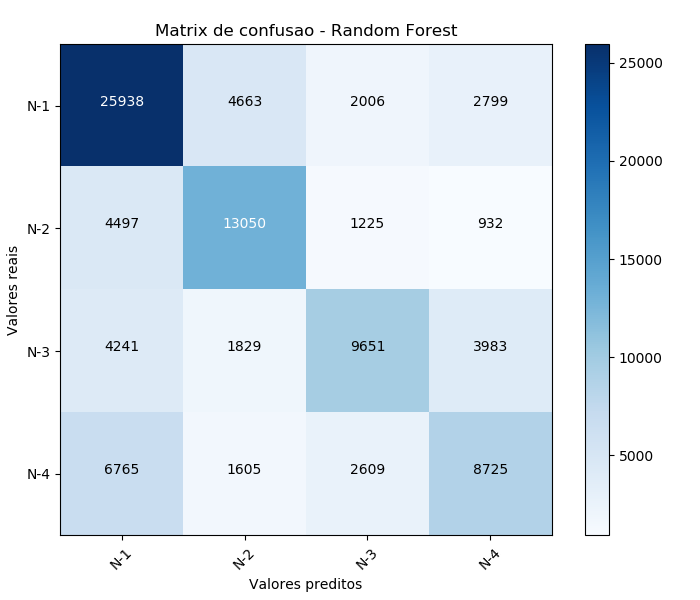

Matrix de confusão, sem normalização
[[25938  4663  2006  2799]
 [ 4497 13050  1225   932]
 [ 4241  1829  9651  3983]
 [ 6765  1605  2609  8725]]


<IPython.core.display.Javascript object>


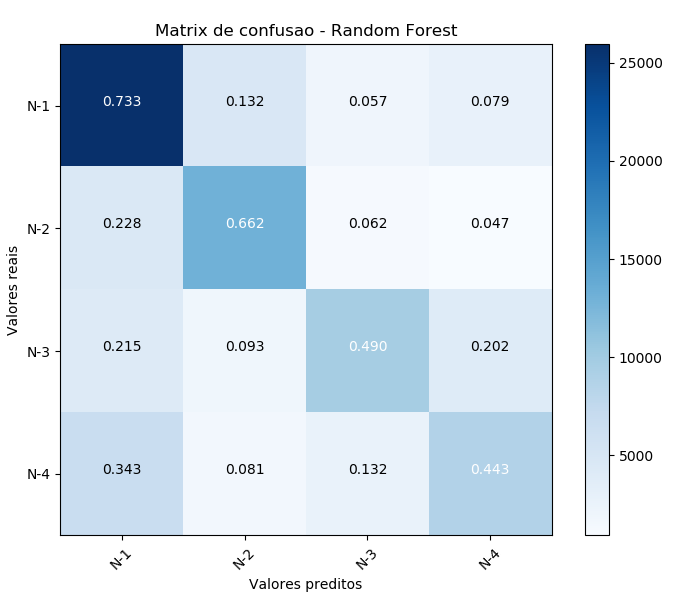

Matrix de confusão normalizada
[[0.73 0.13 0.06 0.08]
 [0.23 0.66 0.06 0.05]
 [0.22 0.09 0.49 0.2 ]
 [0.34 0.08 0.13 0.44]]


In [446]:
# encoding=utf8  
#import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

class_names = np.array(['N-1', 'N-2', 'N-3', 'N-4'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion de matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix de confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix de confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, rfc_y_pred_v)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusao - Random Forest')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusao - Random Forest')
fig_name = 'CF_figs/cm_RF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

---

## Support Vector Machine RBF

In [56]:
from sklearn import svm, datasets

print 'Processing time SVM'
%time svm_rbf = svm.SVC(kernel='rbf', gamma=0.2, C=6, decision_function_shape='ovr').fit(X_train_std, y_train)

print ''
print 'Predict time'  
%time rbf_y_pred = svm_rbf.predict(X_test_std)
from sklearn.metrics import accuracy_score

print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_test, rbf_y_pred)*100))

Processing time SVM
Wall time: 20min 43s

Predict time
Wall time: 3min 6s
SVM-RBF accuracy:---------->64.40 %


In [84]:
accuracy_score(y_test, rbf_y_pred)

0.64399464205983037

In [85]:
print 'Predict time'  
%time rbf_y_pred_v = svm_rbf.predict(X_validate_std)
from sklearn.metrics import accuracy_score
print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_validate, rbf_y_pred_v)*100))

Predict time
CPU times: user 3min 54s, sys: 44 ms, total: 3min 54s
Wall time: 3min 54s
SVM-RBF accuracy:---------->47.84 %


In [86]:
(accuracy_score(y_validate, rbf_y_pred_v))

0.47839334035653053

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, rbf_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')
confusion_matrix
cm = confusion_matrix
cm

array([[ 16563.,   2900.,   2134.,   2109.],
       [  9704.,   9628.,   1527.,   2847.],
       [  6035.,   3484.,   9397.,   4790.],
       [  6752.,   3199.,   5022.,  10731.]])

# Confusion Matrix

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, rbf_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')

In [89]:
confusion_matrix

array([[ 16563.,   2900.,   2134.,   2109.],
       [  9704.,   9628.,   1527.,   2847.],
       [  6035.,   3484.,   9397.,   4790.],
       [  6752.,   3199.,   5022.,  10731.]])

In [90]:
FN = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FP = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [91]:
TPR*100 # Sensitivity

array([ 42.41050853,  50.1171204 ,  51.97455752,  52.40513747])

In [92]:
TNR*100 # Specificity

array([ 87.63502285,  81.8608187 ,  81.82799522,  80.38771367])

In [93]:
PPV*100 # Precision

array([ 69.86838775,  40.6141905 ,  39.63975365,  41.74836601])

In [94]:
ACC*100 # Accuracy

array([ 69.3933197 ,  75.56237219,  76.25333085,  74.46964533])

In [95]:
sum(ACC)/6*100

49.279778011884353

In [96]:
print ('Sensitivity %.2f%%' %(sum(TPR)/4*100))
print ('Specificity %.2f%%' %(sum(TNR)/4*100))
print ('Precision %.2f%%' %(sum(PPV)/4*100))
print ('Accuray %.2f%%' %(sum(ACC)/4*100))

#print ('Sensitivity %.2f%%' %(sum(TPR)/2*100))
#print ('Specificity %.2f%%' %(sum(TNR)/2*100))
#print ('Precision %.2f%%' %(sum(PPV)/2*100))
#print ('Accuray %.2f%%' %(sum(ACC)/2*100))

Sensitivity 49.23%
Specificity 82.93%
Precision 47.97%
Accuray 73.92%


<IPython.core.display.Javascript object>


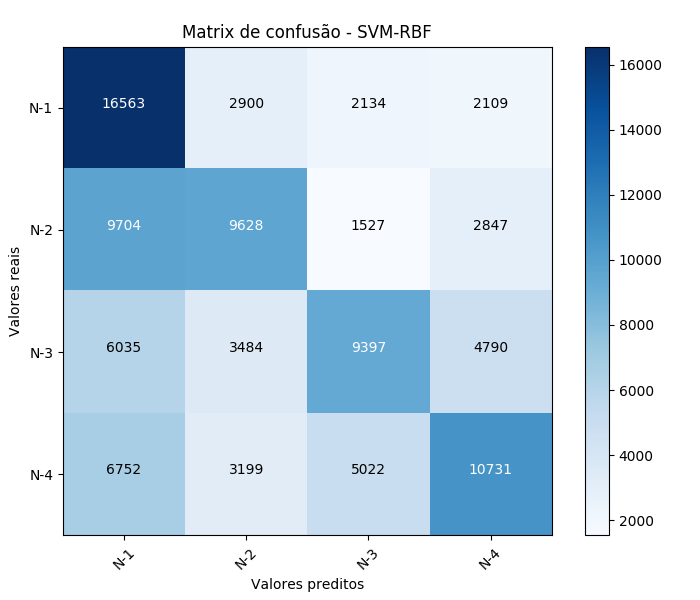

<IPython.core.display.Javascript object>


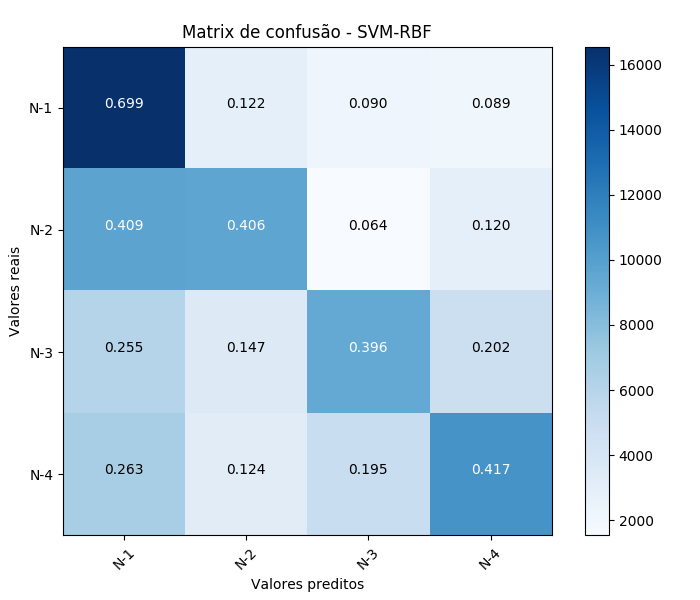

In [98]:
# encoding=utf8  
#import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#%matplotlib notebook
class_names = np.array(['N-1', 'N-2', 'N-3', 'N-4'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion de matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix de confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix de confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, rbf_y_pred_v)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusao - SVM-RBF')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusao - SVM-RBF')
fig_name = 'CF_figs/cm_SVM-RBF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

## Support Vector Machine Poly

In [ ]:
from sklearn import svm, datasets

print 'Processing time Polynomial'
#%time svm = svm.SVC(kernel='poly', degree=2, coef0=4.7, C=48.9, decision_function_shape='ovr').fit(X_train_std, y_train)
%time svm_poly = svm.SVC(kernel='poly', degree=2,  C=500).fit(X_train_std, y_train)


Processing time Polynomial


In [ ]:
#poly_y_pred = svm_poly.predict(X_test_std)

print 'Predict time'  
%time poly_y_pred = svm_poly.predict(X_test_std)
from sklearn.metrics import accuracy_score
print ('SVM-Polynomial accuracy:--->%.2f %%' % (accuracy_score(y_test, poly_y_pred)*100))
        

In [ ]:
print 'Predict time'  
%time poly_y_pred_v = svm_poly.predict(X_validate_std)
from sklearn.metrics import accuracy_score
print ('SVM-Polynomial accuracy:---------->%.2f %%' % (accuracy_score(y_validate, poly_y_pred_v)*100))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, poly_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')
confusion_matrix
cm = confusion_matrix
cm

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, poly_y_pred_v)
confusion_matrix = confusion_matrix.astype('float')

In [ ]:
confusion_matrix

In [ ]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
TPR*100 # Sensitivity

In [ ]:
TNR*100 # Specificity

In [ ]:
PPV*100 # Precision

In [ ]:
ACC*100 # Accuracy

In [ ]:
sum(ACC)/6*100

In [ ]:
# encoding=utf8  
#import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#%matplotlib notebook
class_names = np.array(['N-0', 'N-1', 'N-2', 'N-3', 'N-4', 'N-1,5'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion de matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix de confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix de confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, poly_y_pred_v)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusao - SVM-Poly')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusao - SVM-Poly')
fig_name = 'CF_figs/cm_SVM-Poly.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()

---

## KNeigbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=2, weights = 'distance', algorithm = 'auto', p = 1)
knc = knc.fit(X_train_std, y_train)
print''

print 'Predict time'
%time pred = knc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score



print ('ClassifyKN accuracy:---------->%.2f %%' % (accuracy_score(y_test, pred)*100))

In [81]:
accuracy_score(y_test, pred)*100

70.42095014099111

In [82]:
%time pred = knc.predict(X_validate_std)
accuracy_score(y_validate, pred)*100

40.215143949442144

## Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate, y_pred)
confusion_matrix = confusion_matrix.astype('float')

In [84]:
confusion_matrix

array([[  2.73e+04,   4.75e+03,   2.00e+01,   3.09e+03,   1.06e+03,
          3.72e+03],
       [  1.06e+04,   1.60e+03,   6.00e+00,   3.57e+03,   2.53e+03,
          5.70e+03],
       [  3.58e+04,   5.48e+03,   2.60e+01,   4.52e+03,   3.18e+03,
          4.96e+03],
       [  1.57e+04,   2.55e+03,   1.10e+01,   6.00e+03,   2.24e+03,
          3.45e+03],
       [  4.22e+04,   6.18e+03,   2.60e+01,   1.75e+04,   8.46e+03,
          2.16e+04],
       [  2.57e+04,   2.89e+03,   1.10e+01,   1.80e+04,   4.18e+03,
          1.31e+04]])

In [85]:
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [86]:
TPR*100 # Sensitivity

array([  6.83e+01,   6.68e+00,   4.82e-02,   2.00e+01,   8.81e+00,
         2.05e+01])

In [87]:
TNR*100 # Specificity

array([ 51.45,  92.3 ,  99.97,  83.21,  93.76,  83.83])

In [88]:
PPV*100 # Precision

array([ 17.34,   6.82,  26.  ,  11.41,  39.04,  24.97])

In [89]:
ACC*100 # Accuracy

array([ 53.64,  85.63,  82.45,  77.06,  67.26,  70.68])

In [90]:
sum(ACC)/6*100

72.784951410019673

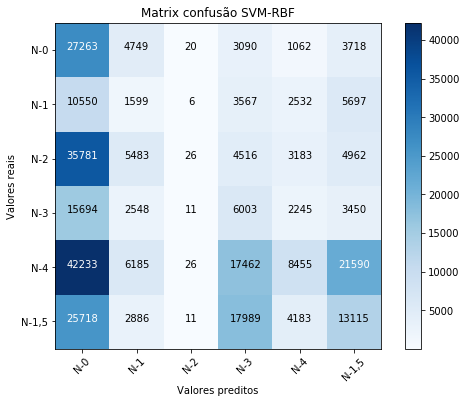

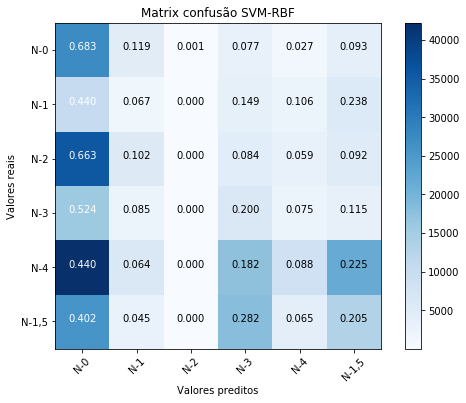

In [91]:
# encoding=utf8  
#import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#%matplotlib notebook
class_names = np.array(['N-0', 'N-1', 'N-2', 'N-3', 'N-4', 'N-1,5'])

yvalid = y_validate 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matrix confusão normalizada")
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, ('%.3f' % cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    else:
        print('Matrix confusão, sem normalização')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    print(cm)

    plt.tight_layout()
    plt.ylabel('Valores reais')
    plt.xlabel('Valores preditos')

# Compute confusion matrix
cnf_matrix = confusion_matrix(yvalid, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix confusao SVM-RBF')
fig.set_size_inches(w=7,h=6)

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix confusao SVM-RBF')
fig_name = 'cm_SVM-RBF.png'
fig.set_size_inches(w=7,h=6)
fig.savefig(fig_name)

plt.show()